<a href="https://colab.research.google.com/github/KrishDabhi/Perkinson-Disease-Classification/blob/main/Perkinson_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Perkinson Disease Classification XG Boost Classifier

#### Parkinson’s disease is a progressive disorder of the central nervous system affecting movement and inducing tremors and stiffness. It has 5 stages to it and affects more than 1 million individuals every year in India. This is chronic and has no cure yet. It is a neurodegenerative disorder affecting dopamine-producing neurons in the brain

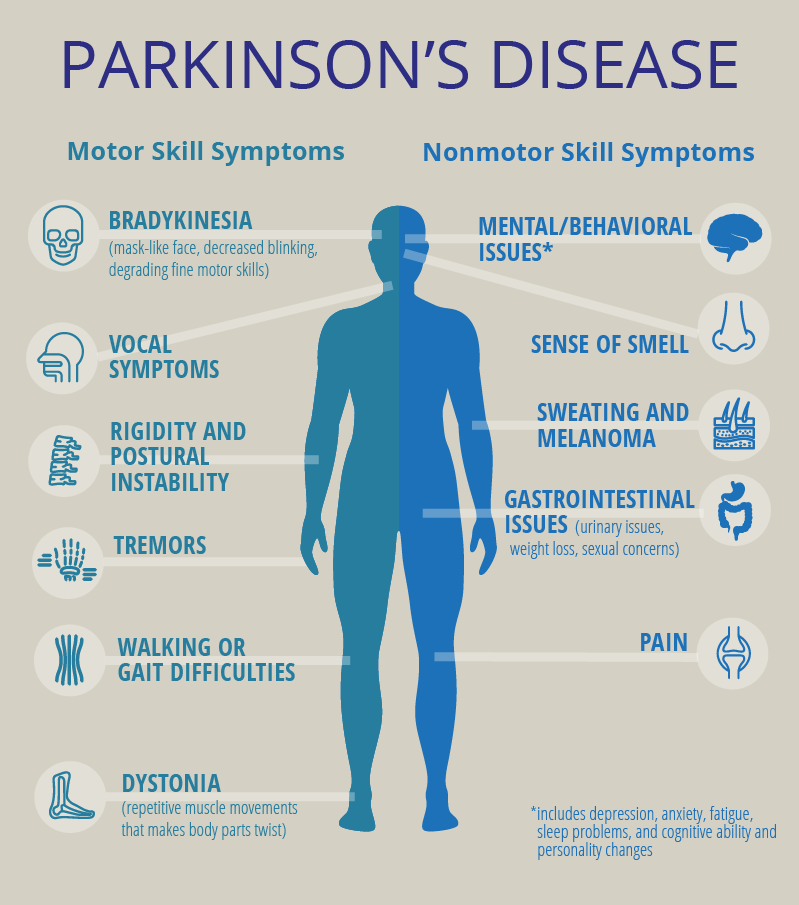

## **Symptoms**:


### *Tremor* :
 A tremor, or shaking, usually begins in a limb, often your hand or fingers. You may rub your thumb and forefinger back and forth, known as a pill-rolling tremor. Your hand may tremble when it's at rest.

### *Slowed movement (bradykinesia)* :
Over time, Parkinson's disease may slow your movement, making simple tasks difficult and time-consuming. Your steps may become shorter when you walk. It may be difficult to get out of a chair. You may drag your feet as you try to walk.

### *Rigid muscles* :
Muscle stiffness may occur in any part of your body. The stiff muscles can be painful and limit your range of motion. Impaired posture and balance. Your posture may become stooped, or you may have balance problems as a result of Parkinson's disease.

### *Loss of automatic movements* :
You may have a decreased ability to perform unconscious movements, including blinking, smiling or swinging your arms when you walk.

### *Speech changes- :
You may speak softly, quickly, slur or hesitate before talking. Your speech may be more of a monotone rather than have the usual inflections.

### *Writing changes*:
It may become hard to write, and your writing may appear sm

## **Data** Set Information:

This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PDs.     

The data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to one voice recording. There are around six recordings per patient, the name of the patient is identified in the first column.For further information or to pass on comments, please contact Max Little (littlem '@' robots.ox.ac.uk).

## **Dataset Information** :-
Matrix column entries (attributes):
- name - ASCII subject name and recording number
- MDVP:Fo(Hz) - Average vocal fundamental frequency
- MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
- MDVP:Flo(Hz) - Minimum vocal fundamental frequency
- MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency
- MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
- NHR,HNR - Two measures of ratio of noise to tonal components in the voice
- <b>status (Target variable)</b> - Health status of the subject (one) - Parkinson's, (zero) - healthy
- RPDE,D2 - Two nonlinear dynamical complexity measures
- DFA - Signal fractal scaling exponent
- spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from xgboost import XGBClassifier, plot_importance


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Datasets/parkinsons_classification_data.csv'
df1 = pd.read_csv(file_path)

In [ ]:
df = df1.copy()

## **1. Problem Statement**

### Predict whether a person has *Parkinson’s Disease* based on biomedical voice measurements using the *XGBoost Classifier*.

## **2. Dataset Exploration**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               195 non-null    object 
 1   MDVP:Fo(Hz)        195 non-null    float64
 2   MDVP:Fhi(Hz)       195 non-null    float64
 3   MDVP:Flo(Hz)       195 non-null    float64
 4   MDVP:Jitter(%)     195 non-null    float64
 5   MDVP:Jitter(Abs)   195 non-null    float64
 6   MDVP:RAP           195 non-null    float64
 7   MDVP:PPQ           195 non-null    float64
 8   Jitter:DDP         195 non-null    float64
 9   MDVP:Shimmer       195 non-null    float64
 10  MDVP:Shimmer(dB)   195 non-null    float64
 11  Shimmer:APQ3       195 non-null    float64
 12  Shimmer:APQ5       195 non-null    float64
 13  MDVP:APQ           195 non-null    float64
 14  Shimmer:DDA        195 non-null    float64
 15  NHR                195 non-null    float64
 16  HNR                195 non

In [ ]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
df.columns

Index(['name           ', 'MDVP:Fo(Hz) ', 'MDVP:Fhi(Hz) ', 'MDVP:Flo(Hz) ',
       'MDVP:Jitter(%) ', 'MDVP:Jitter(Abs) ', 'MDVP:RAP ', 'MDVP:PPQ ',
       'Jitter:DDP ', 'MDVP:Shimmer ', 'MDVP:Shimmer(dB) ', 'Shimmer:APQ3 ',
       'Shimmer:APQ5 ', 'MDVP:APQ ', 'Shimmer:DDA ', 'NHR     ', 'HNR      ',
       'status ', 'RPDE     ', 'DFA      ', 'spread1   ', 'spread2  ',
       'D2       ', 'PPE'],
      dtype='object')

In [ ]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


#### Check For null values present in the Dataset

In [ ]:
df.isnull().sum()

,0
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


## **3. Drop Non-informative Columns**

In [ ]:
df.columns

Index(['name           ', 'MDVP:Fo(Hz) ', 'MDVP:Fhi(Hz) ', 'MDVP:Flo(Hz) ',
       'MDVP:Jitter(%) ', 'MDVP:Jitter(Abs) ', 'MDVP:RAP ', 'MDVP:PPQ ',
       'Jitter:DDP ', 'MDVP:Shimmer ', 'MDVP:Shimmer(dB) ', 'Shimmer:APQ3 ',
       'Shimmer:APQ5 ', 'MDVP:APQ ', 'Shimmer:DDA ', 'NHR     ', 'HNR      ',
       'status ', 'RPDE     ', 'DFA      ', 'spread1   ', 'spread2  ',
       'D2       ', 'PPE'],
      dtype='object')

In [ ]:
df.drop(['name           '], axis=1, inplace=True)


## **5. Define Features & Target**

In [ ]:
# The no of patients with the perkinson disease
print(df[df['status '] == 1].shape[0])

147


In [ ]:
X = df.drop('status ', axis=1)
y = df['status ']

## **6. Standardize the Features**

In [ ]:
# Models like XGBoost are tree-based, but scaling helps convergence and visualization.
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

In [ ]:
X_scaler

array([[-0.82929965, -0.43616456, -0.95203729, ...,  0.48047686,
        -0.21053082,  0.86888575],
       [-0.77097169, -0.53097409, -0.05772056, ...,  1.31118546,
         0.27507712,  1.80360503],
       [-0.90947638, -0.7231683 , -0.10987483, ...,  1.01768236,
        -0.10362861,  1.40266141],
       ...,
       [ 0.49557839,  0.47010361, -0.96839309, ..., -0.81807931,
         0.78033848, -0.83241014],
       [ 1.07876114,  2.19004398, -0.95417967, ..., -0.22906571,
        -0.63700298, -0.92610456],
       [ 1.45481664,  0.69224632, -0.88348115, ..., -0.43085284,
         0.45480231, -0.64505466]])

## **7. Split the Data**

In [ ]:
# Train-test split ensures we evaluate on unseen data.
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.35, random_state=42)

## **8. Build and Train the Model**

In [ ]:
#Now bring in the XGBoost Classifier.
model = XGBClassifier(learning_rate=0.3, max_depth=10, scale_pos_weight=1.5, eval_metric='mlogloss')
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Build and train the Logistic Regression model
model1 = LogisticRegression(random_state=65)
model1.fit(X_train, y_train)

LogisticRegression(random_state=65)

## **9. Make Predictions**

In [ ]:
#Time to test the model on the unseen data.
y_pred = model.predict(X_test)

In [ ]:
#Time to test the model on the unseen data.
y_pred1 = model1.predict(X_test)

In [ ]:
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1
 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1]


In [ ]:
print(y_pred1)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0]


## **10. Evaluate the Model**

In [ ]:
# XGBoost Classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9420289855072463

Confusion Matrix:
 [[13  4]
 [ 0 52]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.76      0.87        17
           1       0.93      1.00      0.96        52

    accuracy                           0.94        69
   macro avg       0.96      0.88      0.91        69
weighted avg       0.95      0.94      0.94        69



In [ ]:
# Logistic regression
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("\nClassification Report:\n", classification_report(y_test, y_pred1))

Accuracy: 0.855072463768116

Confusion Matrix:
 [[11  6]
 [ 4 48]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.65      0.69        17
           1       0.89      0.92      0.91        52

    accuracy                           0.86        69
   macro avg       0.81      0.79      0.80        69
weighted avg       0.85      0.86      0.85        69



## **11. Understand Feature Importance**

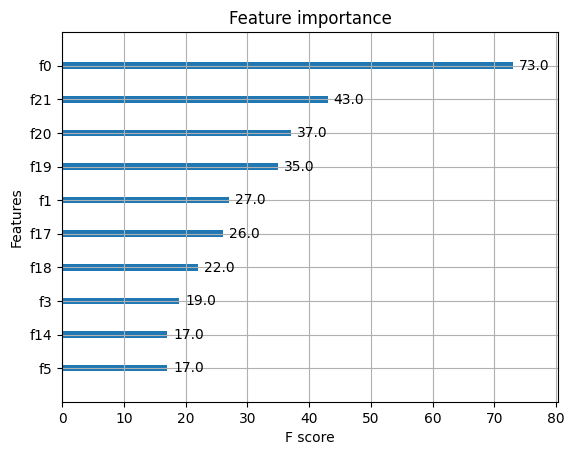

In [ ]:
plot_importance(model, max_num_features=10)
plt.show()

## **12. Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1],
}

search = RandomizedSearchCV(model, param_distributions=params, n_iter=100, cv=5)
search.fit(X_train, y_train)

best_model = search.best_estimator_

In [ ]:
y_pred2 = best_model.predict(X_test)

In [ ]:
# Hypertuned Params
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("\nClassification Report:\n", classification_report(y_test, y_pred2))

Accuracy: 0.927536231884058

Confusion Matrix:
 [[13  4]
 [ 1 51]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.76      0.84        17
           1       0.93      0.98      0.95        52

    accuracy                           0.93        69
   macro avg       0.93      0.87      0.90        69
weighted avg       0.93      0.93      0.93        69

